<h1>Classification of Diabetes - Linear Regression<1>

<h3>Database used: Pima Indians Diabetes Database</h3>
Medical Question: Is it possible to predict the onset of diabetes based on certain diagnostic measures?

The dataset (diabetes.csv) used for this analysis is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of using this dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.

In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

References: Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press. (RIC note: This modeling from this paper uses linear regression and neural networks)

Goal: Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes using simple explainable model.

### Specific features variables (predictor variables) included in this dataset:

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration - a 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

==========================================================================================================

Outcome - Class variable (0 or 1) 268 of 768 are 1 (have diabetes), the others are 0 (don't have diabetes)


In [20]:
import numpy as np
import pandas as pd

In [21]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h3>The Question from this summary is: Can minimum value of columns below be zero (0)?</h3>
On these columns, a value of zero does not make sense and thus indicates missing value. The following columns or variables have an invalid zero value:

Glucose
BloodPressure
SkinThickness
Insulin
BMI
(note - the zero value for Pregnancies can be valid)
It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values

In [23]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


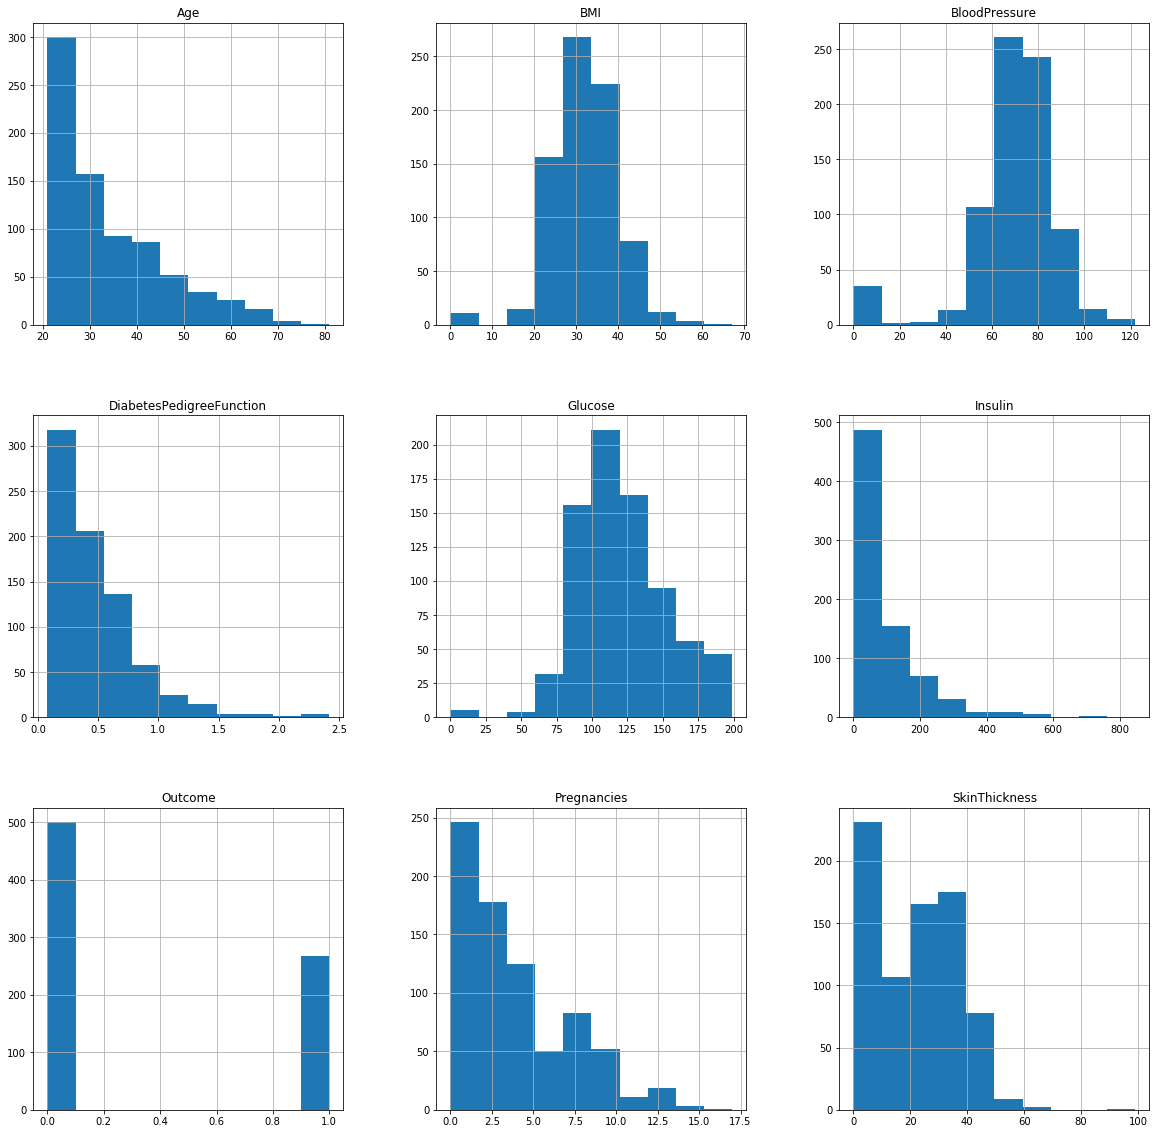

In [24]:
p = diabetes_data.hist(figsize = (20,20))

<h3>Try to impute values for the NaN values in columns based on their distribution</h3>

In [25]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

#### observing the shape of the data

In [26]:
diabetes_data.shape

(768, 9)

<h4>null count analysis</h4>

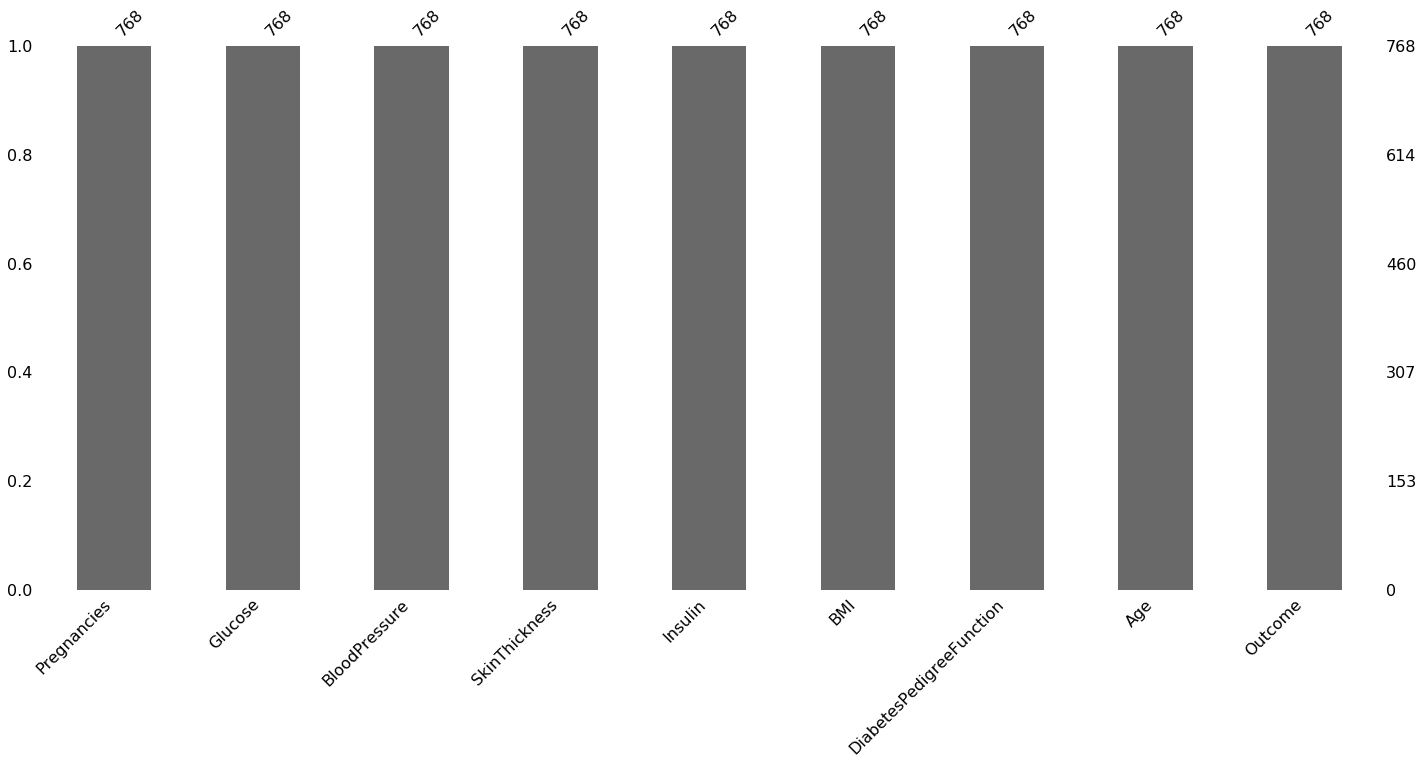

In [27]:
import missingno as msno
p=msno.bar(diabetes_data)

<h4>checking the balance of the data by plotting the count of outcomes by their value</h4>

0    500
1    268
Name: Outcome, dtype: int64


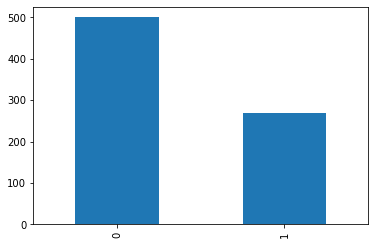

In [28]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")

<h4>This graph (above) shows that the data is biased towards datapoints having outcome value as 0.</h4>
An outcome of 0 means that diabetes was not present. In this dataset, the number of non-diabetics is almost twice the number of diabetic patients.

<h3>Create dataframes for the model</h3>

In [29]:
X =  pd.DataFrame(diabetes_data_copy.drop(["Outcome"],axis = 1),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [30]:
y = diabetes_data_copy.Outcome

In [31]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=42, stratify=y)

<br>
<br>
<h1>Linear Regression Model</h1>
<br>

<h3>Linear models make a prediction using a linear function of input feature variables.</h3>
<br>
<h4>For regression, the general prediction formula for a linear model is:</h4>
    
    y = (w[0] * x[0]) + (w[1] * x[1]) + ... (w[p] * x[p]) + b
    
Where x[0] to x[p] are the feature variables with the number of features equat to (p + 1).

w and b are parameters of the model that are learned.

y is the prediction that the model makes.

<br>
<h4>For a dataset with a single feature, the formula resolves to:</h4>

    y = (w[0] * x[0]) + b
    
Which is the equation for a line where w[0] is the slope and b is the y-axis offset.

<br>
<h4>Linear Regression (Ordinary Least Squares)</h4>

Minimize the mean squared error between predictions and the true regression targets on the training set.

The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples.

Note: In scikit-learn, linear regression has no parameters - which is a benefit, but there is also no way to control model complexity.

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ 2.00589668e-02  6.48833880e-03 -9.22179842e-04 -1.22523659e-04
 -4.41581357e-05  1.45480580e-02  1.32105361e-01  1.93343416e-03]
lr.intercept_: -1.0398817223620154


In [33]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.32
Test set score: 0.33
